\newpage

## Question 1

We consider the surface weather dataset at https://www.kaggle.com/datasets/noaa/gsod. This is the daily global surface summary from 9000 weather stations from 1929-present.

(a) The `gust` variable is maximum wind gust reported for the day in knots to nearest tenth decimal place. The `visib` variable is the mean visibility for the day in miles rounded to nearest tenth decimal place. 

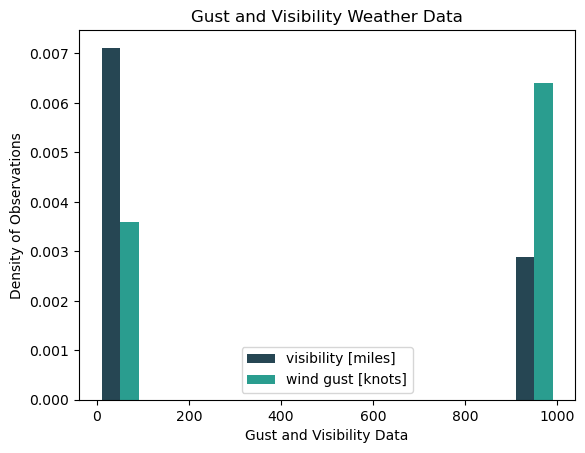

In [1]:
# make historgram of two variables that are continuous.

# Initializing libraries, dataset
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns

pd.options.mode.chained_assignment = None  # default='warn'
plot_colors = ["#264653", "#2A9D8F", "#E9C46A", "#F4A261", "#E76F51"]

df = pd.read_csv("noaa-gosd.csv")

plt.hist([df.visib, df.gust], 
         density=True, 
         label=['visibility [miles]', 'wind gust [knots]'], 
         color=plot_colors[0:2],
         )
plt.title("Gust and Visibility Weather Data")
plt.xlabel('Gust and Visibility Data')
plt.ylabel('Density of Observations')
plt.legend()
plt.show()

The histogram shows the distribution of visibility and gust varaibles. However, since the missing data is set as 999.9, the histogram is inaccurate. Since the missing data placeholder value, 999.9, is much greater than the actual data values, the data has been split with all the real data in the left bins and unknown data in the right bins. 

(b) Next, we identify missing values in the the `gust` and `visib` variables using the information provided in the dataset that 999.9 has been used as a placeholder for missing data. Wherever the number 999.9 is used in the `gust` and `visib` columns, we will replace with NaN.

In [2]:
# code for identifying and replacing the missing values
df_visib_gust = df[['visib','gust']] 
df_visib_gust.replace(999.9, np.nan, inplace=True)

(c) The histograms of the `gust` and `visib` variables again, ignoring any missing values. 

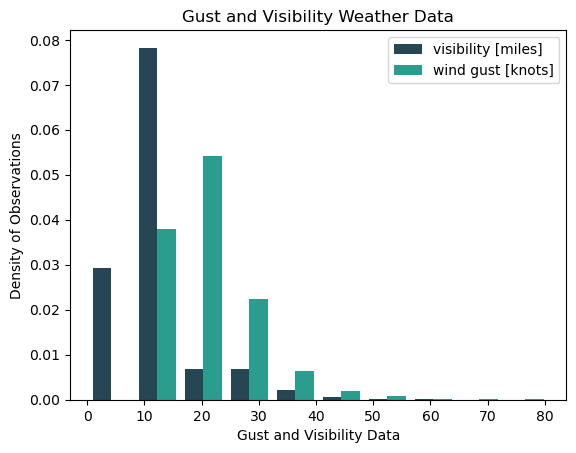

In [3]:
# code for histogram (I didn't ask it, but students must choose 
# an approporate scaling for the y-axis)

plt.hist([df_visib_gust.visib, df_visib_gust.gust], 
          density=True, 
          label=['visibility [miles]', 'wind gust [knots]'], 
          color=plot_colors[0:2],
          )
plt.title("Gust and Visibility Weather Data")
plt.xlabel('Gust and Visibility Data')
plt.ylabel('Density of Observations')
plt.legend()
plt.show()

First considering the gust data. The gust varies from a value of [10, 80] knots. This plot is right skewed, with a mode at 20 knots. There is an approxiate 55% chance that the gust on any given day will be at 20 knots (this calculation is done by taking, probability density value x bin width x 100 = 0.055 x 10 x 100 =55%).

Now considering the visibility data. The visibility varies from a value of [0, 60] miles. This plot is right skewed, with a mode at 10 miles. There is an approximate 80% chance that the visibility on any given day will be 10 miles.

\newpage

## Question 2

We consider [Spotify Tracks DB dataset from Kaggle](https://www.kaggle.com/zaheenhamidani/ultimate-spotify-tracks-db) for the following analysis. 

(a) We find the dimension of the Spotify dataset.

In [4]:
# finding dimension of Spotify dataset
spotify = pd.read_csv("SpotifyFeatures.csv")
spotify.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232725 entries, 0 to 232724
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   genre             232725 non-null  object 
 1   artist_name       232725 non-null  object 
 2   track_name        232724 non-null  object 
 3   track_id          232725 non-null  object 
 4   popularity        232725 non-null  int64  
 5   acousticness      232725 non-null  float64
 6   danceability      232725 non-null  float64
 7   duration_ms       232725 non-null  int64  
 8   energy            232725 non-null  float64
 9   instrumentalness  232725 non-null  float64
 10  key               232725 non-null  object 
 11  liveness          232725 non-null  float64
 12  loudness          232725 non-null  float64
 13  mode              232725 non-null  object 
 14  speechiness       232725 non-null  float64
 15  tempo             232725 non-null  float64
 16  time_signature    23

There are 232725 observations and 18 variables.

(b) Checking uniqueness of 'track_id' column

In [5]:
spotify['track_id'].is_unique

# Finding number of duplicates
print("Number of duplicated rows is: ", sum(spotify.duplicated(subset='track_id')))

# Creating subset with no duplicates
spotify_no_duplicates = spotify.drop_duplicates(subset=['track_id'], keep=False)

Number of duplicated rows is:  55951


The 'track_id' column is not unique. This is because duplicates in track_id are allowed if the genre is different. There are 55951 duplicates in the dataset. 

(c) Finding datatype of each column

In [6]:
spotify_no_duplicates.dtypes

genre                object
artist_name          object
track_name           object
track_id             object
popularity            int64
acousticness        float64
danceability        float64
duration_ms           int64
energy              float64
instrumentalness    float64
key                  object
liveness            float64
loudness            float64
mode                 object
speechiness         float64
tempo               float64
time_signature       object
valence             float64
dtype: object

Looking at the datatypes indicates that the columns listed as 'object' are categorical. While the columns listed as 'int64' or 'float64' are continuous variables.

(d) Number of unique genres in dataset

In [7]:
spotify_no_duplicates['genre'].nunique()

27

There are 27 unique genres in the dataset. 

(e) Finding the 5 most popular genres, taking subset of only those genres

In [8]:
ls_popular_genres = spotify_no_duplicates.groupby('genre').mean('popularity').sort_values('popularity', ascending=False).index[0:5].tolist()
spotify_popular = spotify.loc[spotify['genre'].isin(ls_popular_genres)]
ls_popular_genres

['Pop', 'Rock', 'Rap', 'Hip-Hop', 'Dance']

The 5 most popular genres are pop, rock, rap, hip-hop, and dance.

(f) Exploring distribution within genre

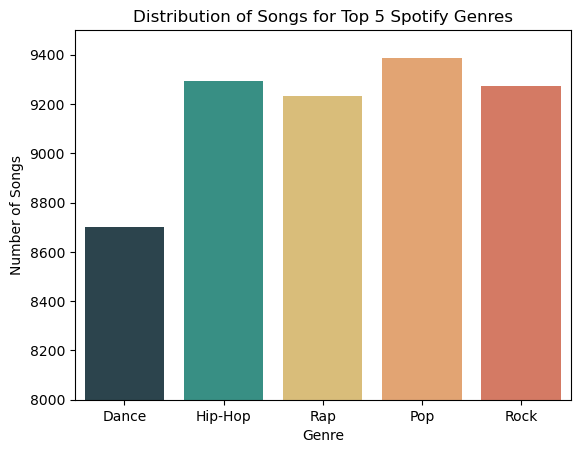

In [9]:
ax = sns.countplot(data=spotify_popular, 
                    x='genre',
                    palette=plot_colors,
                    )
ax.set(ylim=(8000, 9500))
ax.set(xlabel='Genre', 
       ylabel='Number of Songs', 
       title="Distribution of Songs for Top 5 Spotify Genres",
       )
plt.show()

This plot indicates that the most popular genre on Spotify is pop. However, all 5 genres have a relatively similar number of songs, with the widest range being from dance to pop which has  a difference of approximately 700 songs. 

(g) Exploring association between genre and popularityn with a box plot

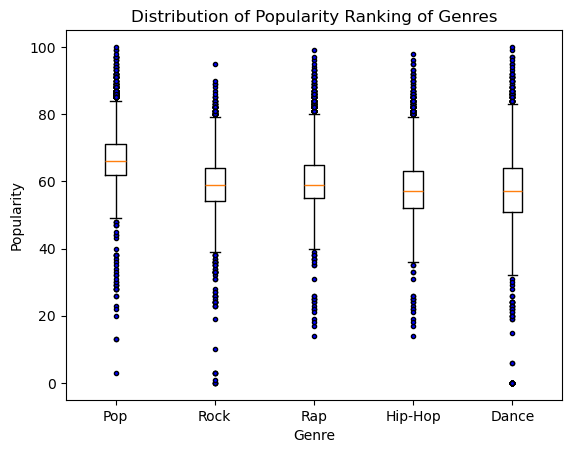

Relative frequencies of each genre:  {'Pop': 0.205, 'Rock': 0.202, 'Rap': 0.201, 'Hip-Hop': 0.203, 'Dance': 0.19}


In [13]:
# Creating 5 arrays of popularity data for the 5 genres
data = [spotify_popular[spotify_popular['genre'] == genre]['popularity'] for genre in ls_popular_genres]

# Relative frequency of genre data
ls_count_freq = [spotify_popular.groupby('genre').count().loc[genre, 'track_id'] for genre in ls_popular_genres]
ls_rel_freq = [round(i/len(spotify_popular), 3) for i in ls_count_freq]

plt.boxplot(data, 
            labels=ls_popular_genres,
            widths=ls_rel_freq,
            flierprops=dict(marker='o', markerfacecolor='b', markersize=3),
            )
plt.title('Distribution of Popularity Ranking of Genres')
plt.xlabel('Genre')
plt.ylabel('Popularity')
plt.show()

print('Relative frequencies of each genre: ', dict(zip(ls_popular_genres, ls_rel_freq)))

This box plot indicates that pop is the most popular genre, with an average song popularity of ~65. Interestingly, pop also has a wide spread of observations with some outliers showing a popularity in the [0, 10] range. These outliers are also found in the rock and dance genre.

The genres with fewer outliers are rap and hip-hop, indicating that most songs in these genres are uniformly popular. 

This box plot also uses different widths to indicate the relative frequency of the songs in each genre. Visually, it is clear that the widths are all similar indicating that the relative frequencies are all similar. To further understand the differences in relative frequency, we can look at a dict showing the relative frequency of each genre. This dictionary shows that all the genres have a relative freq of 20%, explaining the widths seen in the plot.  

(h) Exploring the relationship between acousticness and popularity

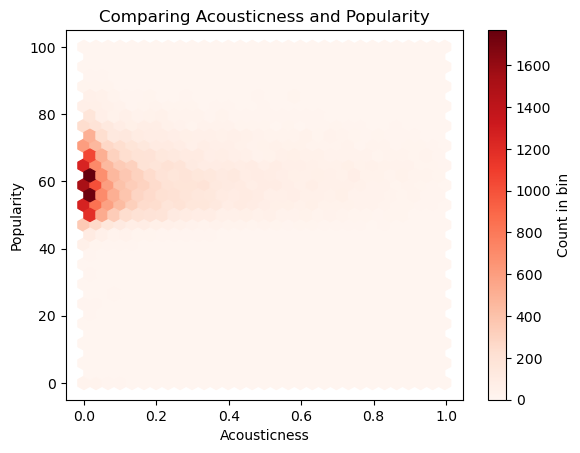

In [11]:
plt.hexbin(x=spotify_popular['acousticness'], 
           y=spotify_popular['popularity'],
           cmap='Reds',
           gridsize=30)
plt.colorbar(label='Count in bin')
plt.title('Comparing Acousticness and Popularity')
plt.xlabel('Acousticness')
plt.ylabel('Popularity')
plt.show()

This 2D hexagonagal histogram shows that most of the observations are within the acousticness range of [0.0, 0.1] and popularity range of [45, 80].

This plot indicates that the majority of songs in the top 5 genres have a low acousticness rating, as the bins at 0.00 acousticness have the most observations. Based only on this plot, it looks like music in the top 5 genres is not very acoustic, as there are little to no observations in the bins with an acousticness of ~0.4+. One may conclude that low acoustic songs are thus more popular.

However, it is important to note that exploring the acousticness data more may be benficial in understanding this correlation. It is interesting that there are no songs with an acousticness level of 1.0 in the top 5 genres. As stated, this could indicate that very acoustic songs are not popular, but it may also indicate that there are not many songs with an acoustic value of 1.0 or that these songs tend not to be in these genres (but may be popular within less popular genres, and thus not included in this data).  

To further understand this, we could look at the distribution of acousticness across all tracks in the initial dataset. If most of the songs have a low acousticness rating, then that would help inform our interpretation of this plot. 